# Explorative Datenanalyse



## Verwendete Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Datensatz importieren

Der Link zu den Daten: [https://www.kaggle.com/datasets/laotse/credit-risk-dataset]

In [5]:
df = pd.read_csv('data/credit_risk_dataset.csv')

Ausgeben der ersten 5 Zeilen des Datensatzes: 

In [34]:
print(df.shape)
print(df.head())

(32581, 12)
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                   

In [37]:
age_values_to_exclude = [144, 123]
filtered_df = df[~df['person_age'].isin(age_values_to_exclude)]

In [40]:
df.describe()[['person_income']]

,person_income
count,3.258100e+04
mean,6.607485e+04
std,6.198312e+04
min,4.000000e+03
25%,3.850000e+04
50%,5.500000e+04
75%,7.920000e+04
max,6.000000e+06


In [41]:
df.describe()[['person_emp_length']]

,person_emp_length
count,31686.000000
mean,4.789686
std,4.142630
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,123.000000


In [43]:
df.describe()[['loan_amnt']]

,loan_amnt
count,32581.000000
mean,9589.371106
std,6322.086646
min,500.000000
25%,5000.000000
50%,8000.000000
75%,12200.000000
max,35000.000000


In [44]:
df.describe()[['loan_percent_income']]

,loan_percent_income
count,32581.000000
mean,0.170203
std,0.106782
min,0.000000
25%,0.090000
50%,0.150000
75%,0.230000
max,0.830000


## Korrelationsmatrix der numerischen Werten

Filtern der Spalten, die numerische Werte beinhalten:

In [23]:
numeric_columns = filtered_df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = filtered_df[numeric_columns]
print(numeric_df.head())

   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cb_person_cred_hist_length  
0            1                 0.59                           3  
1            0                 0.10                           2  
2            1                 0.57                           3  
3            1                 0.53                           2  
4            1                 0.55                           4  


Korrelationsmatrix berechnen:

In [24]:
correlation_matrix = numeric_df.corr()

Korrelationsmatrix mit Seaborn visualieren:

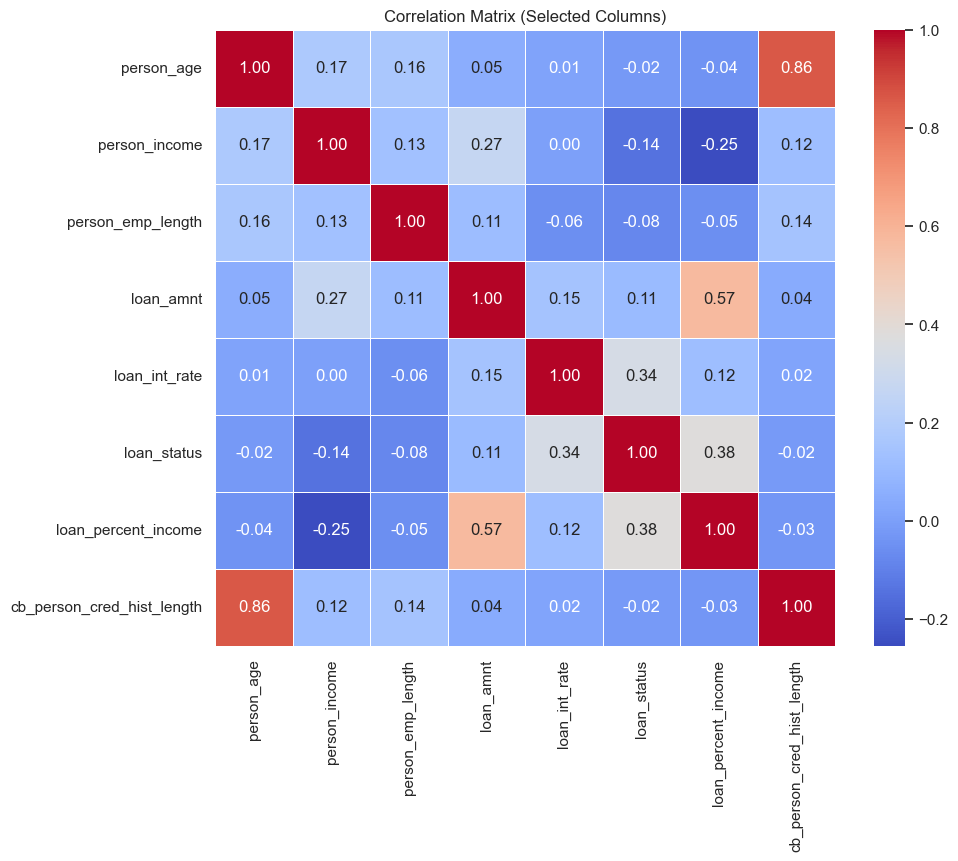

In [11]:
sns.set(style='white')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Selected Columns)')
plt.show()

### Findings:

- Personen nehmen im Laufe Ihres Lebens mehrere Kredite auf. Das Alter der meisten Kreditnehmer ist 20 bis 30. 

## Boxplots aller numerischen Variablen

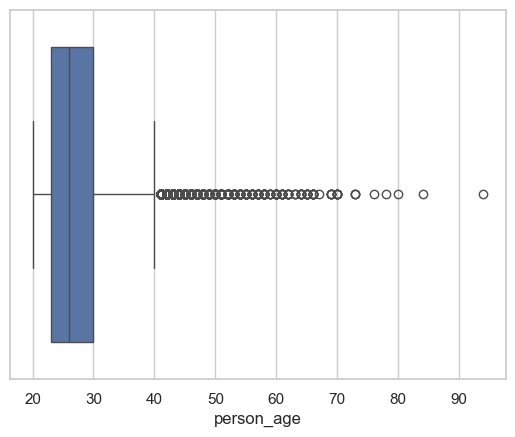

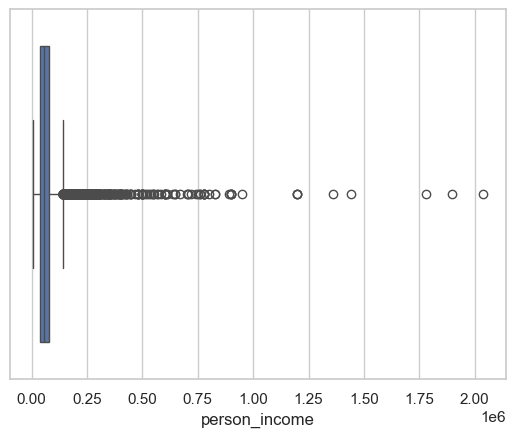

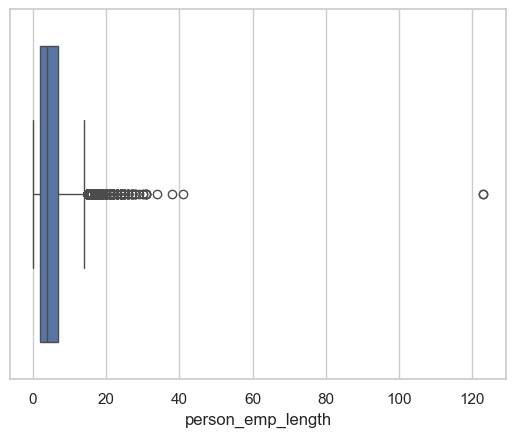

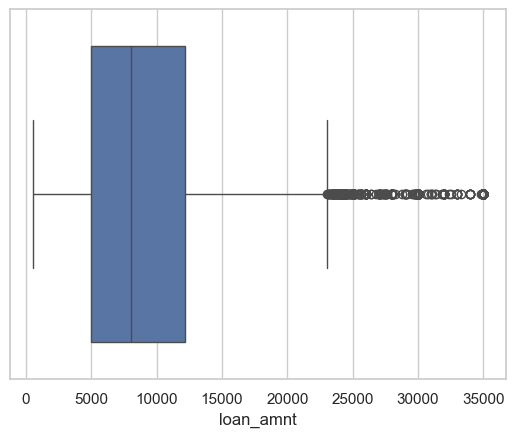

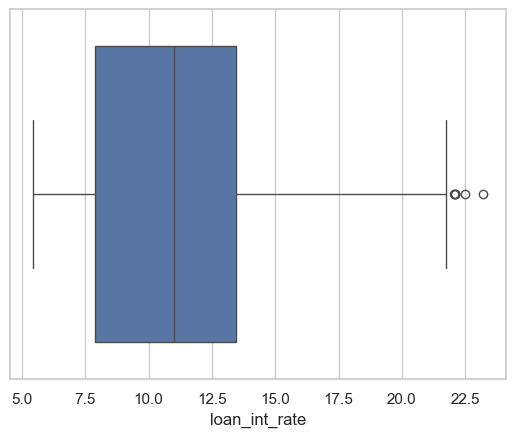

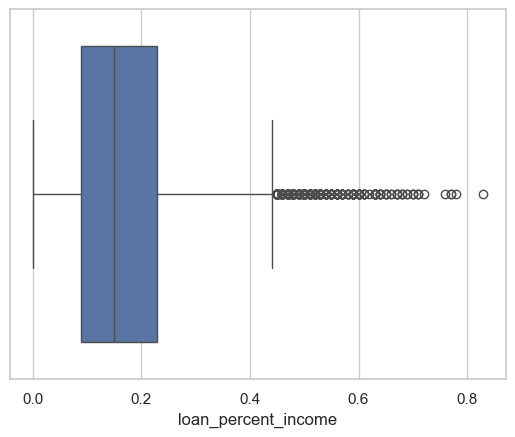

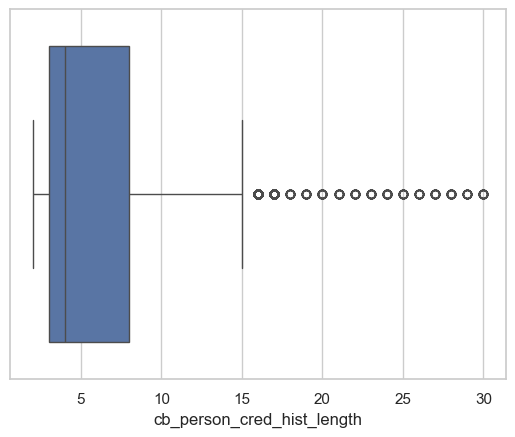

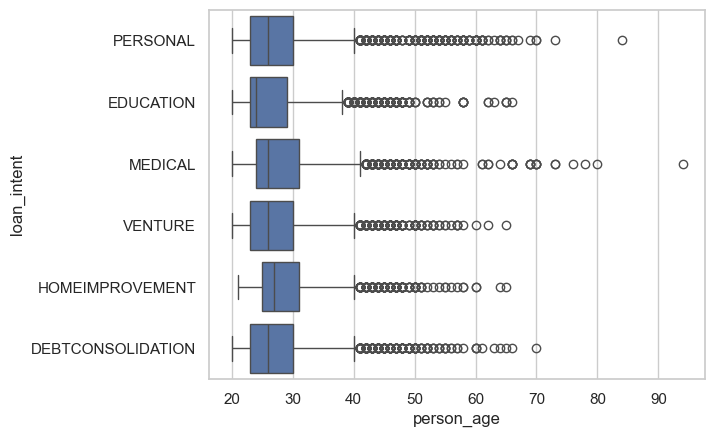

In [12]:
# Set the style of the visualization
sns.set(style='whitegrid')

sns.boxplot(x='person_age',  data=filtered_df)
plt.show()

sns.boxplot(x='person_income',  data=filtered_df)
plt.show()

sns.boxplot(x='person_emp_length',  data=filtered_df)
plt.show()

sns.boxplot(x='loan_amnt',  data=df)
plt.show()

sns.boxplot(x='loan_int_rate',  data=df)
plt.show()

sns.boxplot(x='loan_percent_income',  data=df)
plt.show()

sns.boxplot(x='cb_person_cred_hist_length',  data=df)
plt.show()

sns.boxplot(x='person_age', y ='loan_intent',  data=filtered_df)
plt.show()


### Findings:

- Daten müssen nochmal gereinigt werden. (Alter, Employment length)


## Bivariate Analyse 

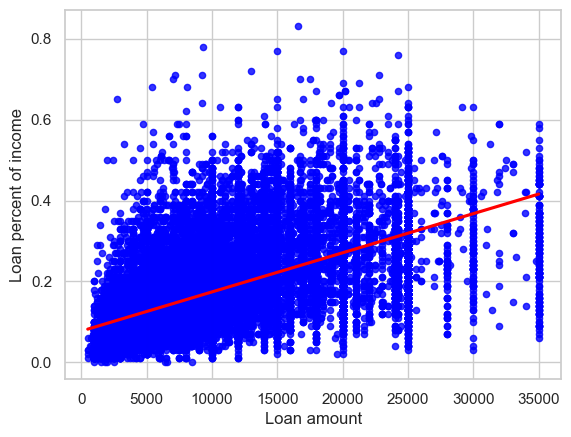

In [13]:
# Create a scatter plot using Seaborn
sns.regplot(x='loan_amnt', y='loan_percent_income', 
            color='blue', 
            marker='o', 
            scatter_kws={'s': 20},
            line_kws={'color': 'red'}, 
            ci=None,
            label='Scatter Plot',  
            data=filtered_df)

# Add labels and title
plt.xlabel('Loan amount')
plt.ylabel('Loan percent of income')
#plt.title('Scatter Plot Example')

# Add legend if necessary
#plt.legend()

# Show the plot
plt.show()

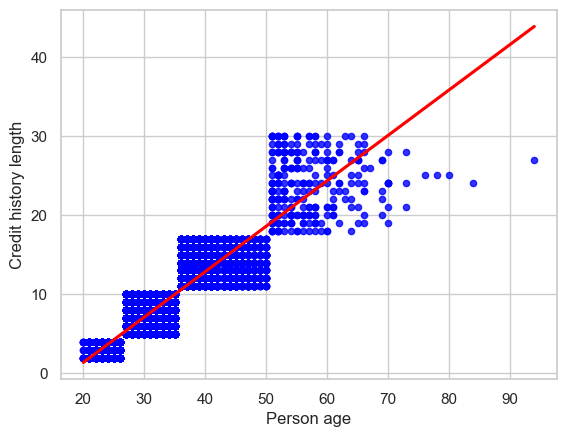

In [14]:
# Create a scatter plot using Seaborn
sns.regplot(x='person_age', y='cb_person_cred_hist_length', 
            color='blue', 
            marker='o', 
            scatter_kws={'s': 20},
            line_kws={'color': 'red'}, 
            ci=None,
            label='Scatter Plot',  
            data=filtered_df)

# Add labels and title
plt.xlabel('Person age')
plt.ylabel('Credit history length')
#plt.title('Scatter Plot Example')

# Add legend if necessary
#plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='loan_amnt', ylabel='loan_percent_income'>

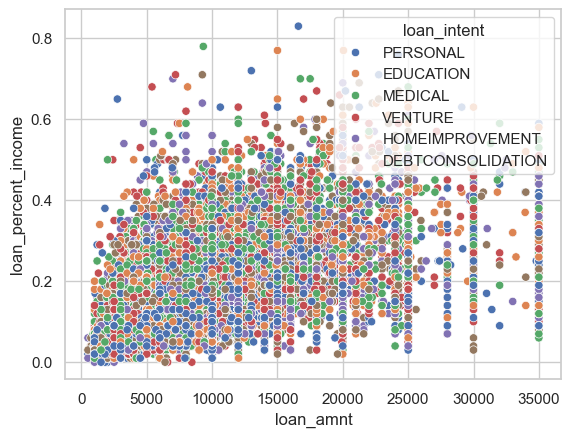

In [102]:
sns.scatterplot(data=filtered_df, 
                x='loan_amnt', 
                y='loan_percent_income', 
                hue='loan_intent', 
                palette="deep")

## Multivariate Analys

Daten standardisieren:

In [25]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

Delete lines that contain missing values:

In [26]:
# Drop rows with missing values
df_clean = numeric_df.dropna()

In [27]:
# Initialize PCA
pca = PCA(n_components=2)  # You can adjust the number of components as per your requirement

# Fit PCA
pca.fit(df_clean)

# Transform the data
pca_data = pca.transform(df_clean)

# Convert PCA transformed data to DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

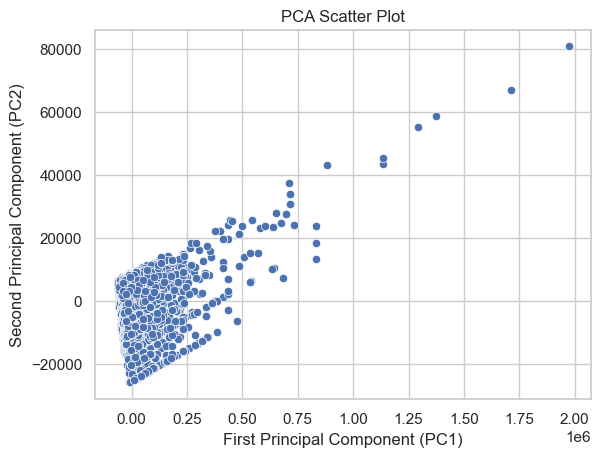

In [28]:
# Create a scatterplot of the principal components
sns.scatterplot(x='PC1', y='PC2', data=pca_df)

# Show the plot
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('PCA Scatter Plot')
plt.show()

In [31]:
# Initialize PCA
pca = PCA(n_components=3)

# Fit data
pca.fit(df_clean)

# Access the loadings
loadings = pca.components_

# Print the loadings for each principal component
for i, component in enumerate(loadings):
    print(f"Principal Component {i+1}:")
    for j, loading in enumerate(component):
        print(f"Variable {j+1}: {loading}")

# You can also retrieve explained variance ratio to see how much variance is explained by each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

print(df_clean.head())

Principal Component 1:
Variable 1: 1.6916932726138176e-05
Variable 2: 0.9991842036648357
Variable 3: 1.2794963503256415e-05
Variable 4: 0.04038473229237772
Variable 5: -1.9802522662215616e-07
Variable 6: -1.327239302566432e-06
Variable 7: -6.067702880242727e-07
Variable 8: 9.606174036119323e-06
Principal Component 2:
Variable 1: -1.0162210303673207e-05
Variable 2: 0.040384732830854364
Variable 3: -4.306475899906002e-05
Variable 4: -0.9991841992375613
Variable 5: -8.405666235010294e-05
Variable 6: -1.2272405845478567e-05
Variable 7: -1.2698930011260436e-05
Variable 8: -3.5961553935812406e-06
Principal Component 3:
Variable 1: 0.843564404047799
Variable 2: -2.020774749073107e-05
Variable 3: 0.12384733803496217
Variable 4: -1.691536082835677e-05
Variable 5: 0.003620693684023019
Variable 6: -0.0002178044876043369
Variable 7: -9.940680155135445e-05
Variable 8: 0.5225397263820164
Explained Variance Ratio: [9.86735604e-01 1.32643666e-02 1.89630946e-08]
   person_age  person_income  person_emp

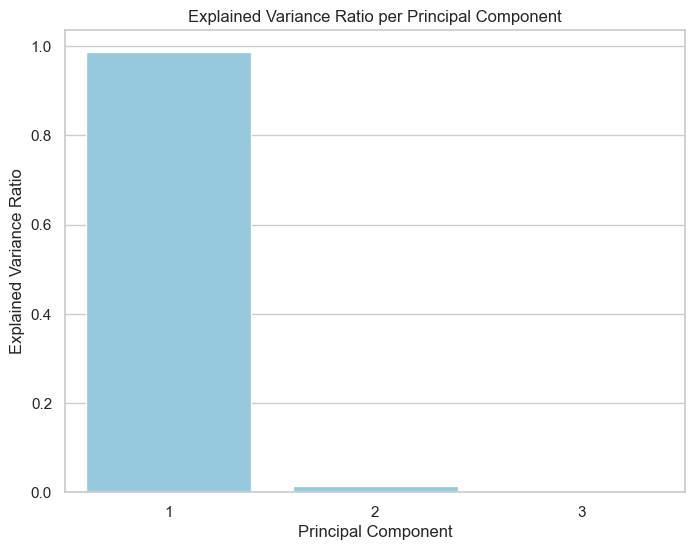

In [32]:
# Initialize PCA
pca = PCA(n_components=3)

# Fit data
pca.fit(df_clean)

# Plotting the explained variance ratio
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(1, pca.n_components_ + 1), y=pca.explained_variance_ratio_, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()

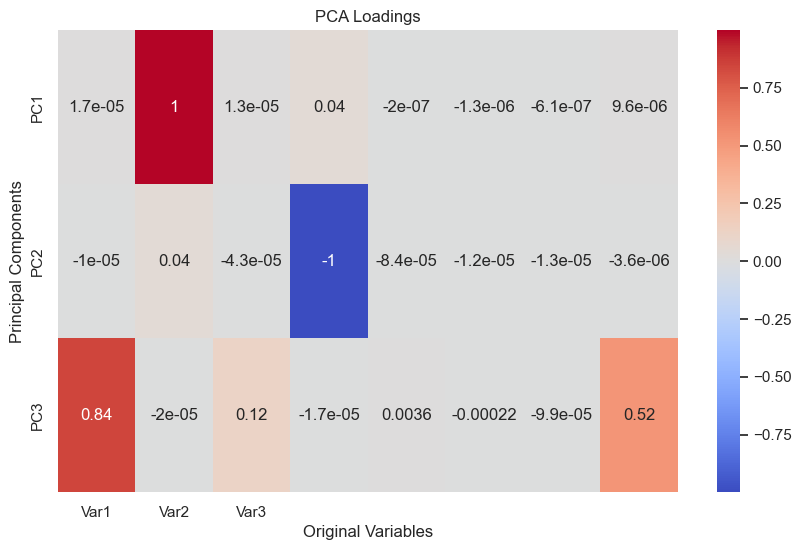

In [33]:
# Plotting loadings
plt.figure(figsize=(10, 6))
sns.heatmap(pca.components_, cmap='coolwarm', annot=True, xticklabels=['Var1', 'Var2', 'Var3'], yticklabels=['PC1', 'PC2', 'PC3'])
plt.xlabel('Original Variables')
plt.ylabel('Principal Components')
plt.title('PCA Loadings')
plt.show()